In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

import seaborn as sns

In [5]:
data = pd.read_csv('NaiveBayes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
data.shape

(400, 3)

In [9]:
data.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [13]:
data.isna().sum()
data.isna().sum().sum()

data.dropna()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [15]:
X = data.drop('Purchased', axis=1)
Y = data['Purchased']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
model = GaussianNB()

model.fit(x_train, y_train)

GaussianNB()

In [20]:
y_pred = model.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
print(f'Accuracy is : {accuracy}')
print(f'Precision is : {precision}')
print(f'Recall is : {recall}')
print(f'F1 score is : {f1score}')
print(f'Confusion matrix is : {conf_matrix}')
print(f'classification report is : {classification_rep}')

Accuracy is : 0.925
Precision is : 0.975
Recall is : 0.8297872340425532
F1 score is : 0.896551724137931
Confusion matrix is : [[72  1]
 [ 8 39]]
classification report is :               precision    recall  f1-score   support

           0       0.90      0.99      0.94        73
           1       0.97      0.83      0.90        47

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



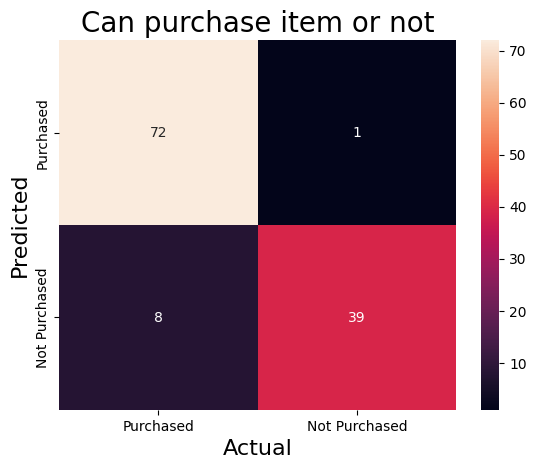

In [26]:
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Purchased', 'Not Purchased'],
            yticklabels=['Purchased', 'Not Purchased'])

plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.title('Can purchase item or not', fontsize=20)
plt.show()

In [30]:
y_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

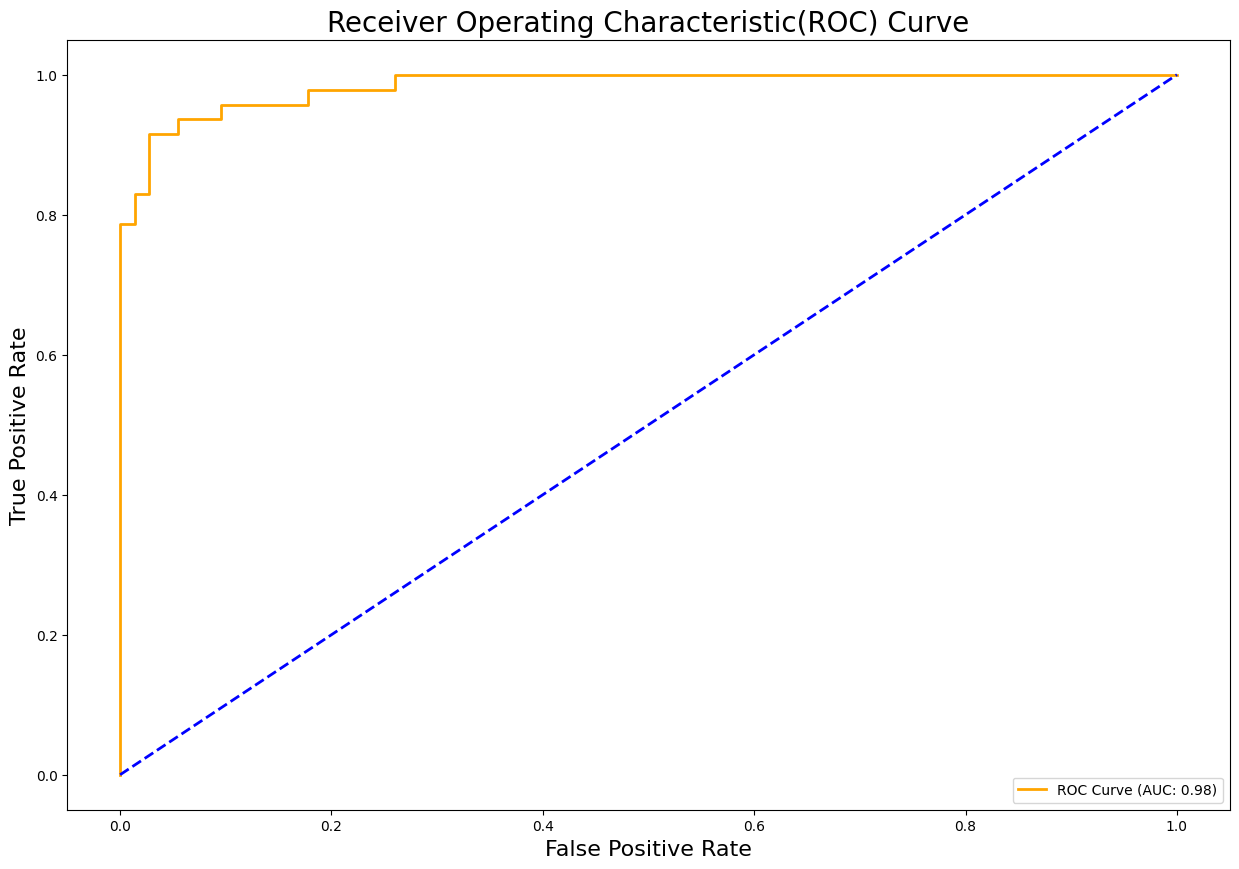

In [35]:
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, color="Orange", lw=2, label=f'ROC Curve (AUC: {roc_auc:.2f})')
plt.plot([0,1],[0,1], color="Blue", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic(ROC) Curve", fontsize=20)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='lower right')
plt.show()